In [1]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

#### **Assignment 1: Implement PCA using Numpy.**

In [2]:
class PCA:
    def __init__(self, n_components) -> None:
        self.n_components = n_components
        self.components = None
        self.mean_image = None

    def mean(self, x: np.ndarray) -> np.ndarray:
        self.mean_image = np.mean(x, axis=0)
        return self.mean_image

    def fit(self, x: np.ndarray) -> None:
        x = x - self.mean(x)
        cov = np.cov(x, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        # Chuyển dấu các vector về cùng dương
        for i in range(eigenvectors.shape[1]):
            max_i  = np.argmax(np.abs(eigenvectors[:,i]))
            if eigenvectors[max_i, i] < 0:
                eigenvectors[:,i] *= -1

        eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(eigenvectors.shape[1])]
        eigen_pairs.sort(key=lambda pair: pair[0], reverse=True)

        eigenvalues = np.array([value for (value, _) in eigen_pairs])
        eigenvectors = np.array([vector for (_, vector) in eigen_pairs])

        self.components = eigenvectors[:self.n_components]
        

    def transform(self, x: np.ndarray) -> np.ndarray:
        x = x - self.mean(x)
        return x @ self.components.T

    def inverse_transform(self, x: np.ndarray) -> np.ndarray:
        return x @ self.components + self.mean_image

#### **Assignment 2:**

**Reading the training images**

In [3]:
!unzip 'yalefaces.zip'

Archive:  yalefaces.zip
   creating: yalefaces/
   creating: yalefaces/yalefaces/
   creating: yalefaces/yalefaces/person-1/
  inflating: yalefaces/yalefaces/person-1/centerlight  
  inflating: yalefaces/yalefaces/person-1/happy  
  inflating: yalefaces/yalefaces/person-1/leftlight  
  inflating: yalefaces/yalefaces/person-1/noglasses  
  inflating: yalefaces/yalefaces/person-1/normal  
  inflating: yalefaces/yalefaces/person-1/rightlight  
  inflating: yalefaces/yalefaces/person-1/sad  
  inflating: yalefaces/yalefaces/person-1/sleepy  
  inflating: yalefaces/yalefaces/person-1/surprised  
  inflating: yalefaces/yalefaces/person-1/wink  
   creating: yalefaces/yalefaces/person-10/
  inflating: yalefaces/yalefaces/person-10/centerlight  
  inflating: yalefaces/yalefaces/person-10/glasses  
  inflating: yalefaces/yalefaces/person-10/happy  
  inflating: yalefaces/yalefaces/person-10/leftlight  
  inflating: yalefaces/yalefaces/person-10/normal  
  inflating: yalefaces/yalefaces/person-1

In [4]:
labels = []
images = []

for i in range (1, 16):
  path = f"yalefaces/yalefaces/person-{i}"
  for file in os.listdir(os.path.join(path)):
    label = i
    labels.append(label)

    image = imread(os.path.join(path, file))
    image = image.squeeze(0)
    image = resize(image, (68, 80), anti_aliasing=True)
    images.append(image)

images = np.array(images)
labels = np.array(labels)

In [5]:
images.shape, labels.shape

((150, 68, 80), (150,))

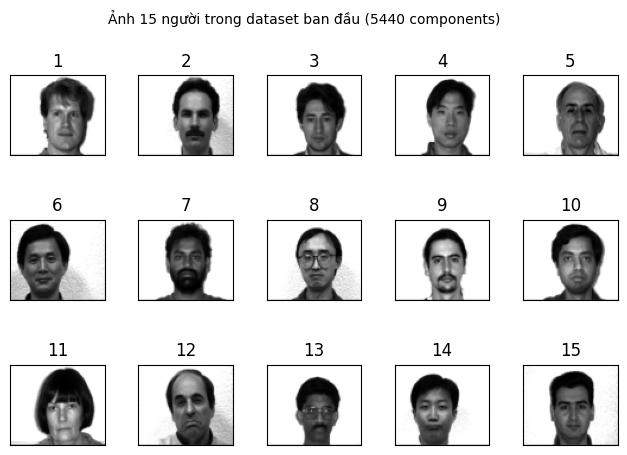

In [6]:
num_people = 15
images_per_person = 10
fig, axes = plt.subplots(3, 5, figsize = (8, 5))
for i in range(0, num_people):
  tmp = i * images_per_person + 2
  stt = labels[tmp]
  axes[i//5, i%5].imshow(images[tmp], cmap='gray')
  axes[i//5, i%5].set_title("%d"%(stt))
  axes[i//5, i%5].set_xticks([])
  axes[i//5, i%5].set_yticks([])
plt.subplots_adjust(hspace=0.8, top=0.85)
plt.suptitle("Ảnh 15 người trong dataset ban đầu (5440 components)\n", fontsize=10)
plt.show()

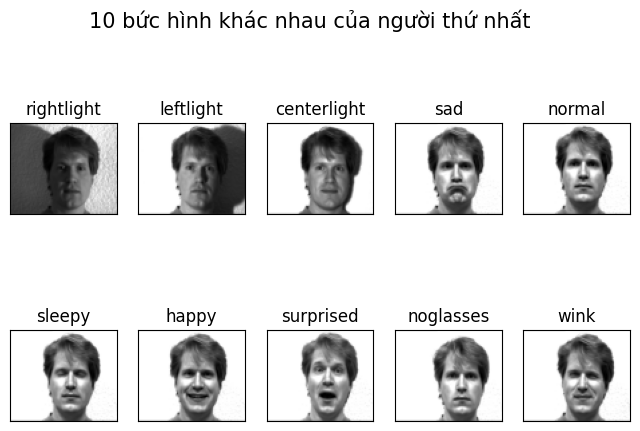

In [7]:
fig, axes = plt.subplots(2, 5, figsize = (8, 5))
for i, file in enumerate(os.listdir("yalefaces/yalefaces/person-1")):
  image = imread(os.path.join("yalefaces/yalefaces/person-1", file))
  image = image.squeeze(0)
  image = resize(image, (68, 80), anti_aliasing=True)
  axes[i//5, i%5].imshow(image, cmap='gray')
  axes[i//5, i%5].set_title(file)
  axes[i//5, i%5].set_xticks([])
  axes[i//5, i%5].set_yticks([])
plt.subplots_adjust(hspace=0.5, top=0.8)
plt.suptitle("10 bức hình khác nhau của người thứ nhất", fontsize=15)
plt.show()

In [8]:
# Chuyển về ma trận 2 chiều
images = images.reshape(images.shape[0], -1)
images.shape

(150, 5440)

**Approximating the Principle Space having 20 dimensions**

In [9]:
pca = PCA(n_components=20)

In [10]:
pca.fit(images)
pca.components.shape

(20, 5440)

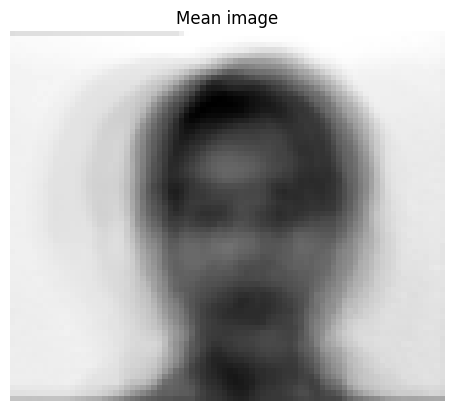

In [11]:
mean_image = pca.mean(images)

plt.imshow(mean_image.reshape(68, 80), cmap='gray')
plt.title("Mean image")
plt.axis('off')
plt.show()

**Visualize the base of this Principle Space**

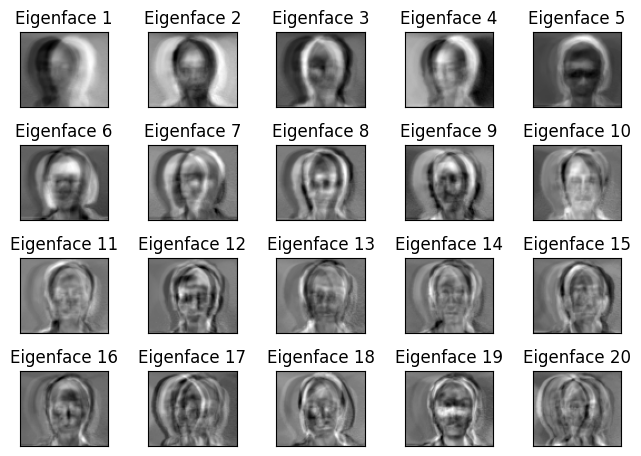

In [12]:
eigenfaces = pca.components.reshape(20, 68, 80)
fig, axes = plt.subplots(4, 5, figsize=(8, 6))
for i in range(20):
    axes[i//5, i%5].imshow(eigenfaces[i], cmap='gray')
    axes[i//5, i%5].set_title("Eigenface %d"%(i+1))
    axes[i//5, i%5].set_xticks([])
    axes[i//5, i%5].set_yticks([])
plt.subplots_adjust(hspace=0.5, top=0.8)
plt.show()

In [13]:
X_train = pca.transform(images)
X_train.shape

(150, 20)

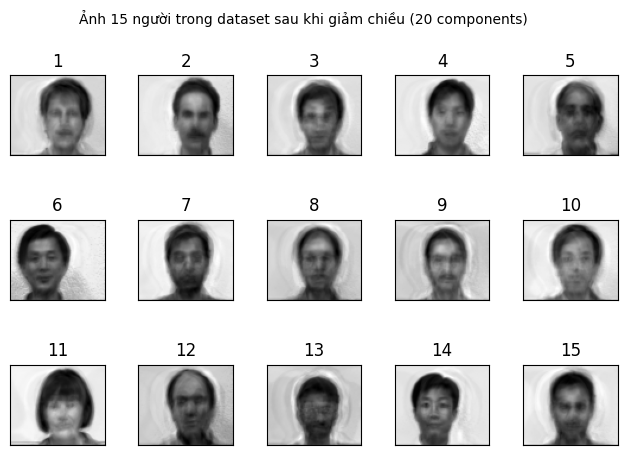

In [14]:
images_pca = pca.inverse_transform(X_train)
images_pca = images_pca.reshape(images_pca.shape[0], 68, 80)
fig, axes = plt.subplots(3, 5, figsize=(8, 5))
for i in range(0, num_people):
    tmp = i * images_per_person + 2
    stt = labels[tmp]
    axes[i//5, i%5].imshow(images_pca[tmp], cmap='gray')
    axes[i//5, i%5].set_title("%d"%(stt))
    axes[i//5, i%5].set_xticks([])
    axes[i//5, i%5].set_yticks([])
plt.subplots_adjust(hspace=0.8, top=0.85)
plt.suptitle("Ảnh 15 người trong dataset sau khi giảm chiều (20 components)\n", fontsize=10)
plt.show()

#### **Assignment 3:**

**Assign persons to the face images in testing data**

In [15]:
targets = []
test_images = []

path = "yalefaces/yalefaces/test"
for file in os.listdir(os.path.join(path)):
    target = int(file.split("-")[1].split(".")[0])
    targets.append(target)

    image = imread(os.path.join(path, file))
    image = image.squeeze(0)
    image = resize(image, (68, 80), anti_aliasing=True)
    test_images.append(image)

test_images = np.array(test_images)
targets = np.array(targets)

In [16]:
test_images.shape, targets.shape

((15, 68, 80), (15,))

In [17]:
X_test = pca.transform(test_images.reshape(test_images.shape[0], -1))
X_test.shape

(15, 20)

**Evaluate the accuracy of this face recognition system**

In [18]:
# Dự đoán bằng phương pháp KNN kết hợp với ngưỡng chọn e
from scipy.spatial.distance import cdist
from collections import Counter

list_of_distances = cdist(X_test, X_train, metric='euclidean')

e = 2 # Ngưỡng chọn
k = 4 # Số ảnh gần nhất trong KNN

predictions = []

for i, test_vector in enumerate(X_test):
    distance = list_of_distances[i]
    condition_vectors = np.where(distance < e)[0]

    if len(condition_vectors) > 0:
        if len(condition_vectors) > 1:
            Label_pred = labels[condition_vectors] 
            condition_distances = distance[condition_vectors]
            
            sorted_vectors = np.argsort(condition_distances)[:k]
            label_pred = Label_pred[sorted_vectors]
        
            count = Counter(label_pred)
            prediction = count.most_common(1)[0][0]
        else:
            prediction = labels[condition_vectors[0]]
    else:
        closest_vector = np.argmin(distance)
        prediction = labels[closest_vector]

    predictions.append(prediction)

In [19]:
correct_labels = 0
for i, (true, prediction) in enumerate(zip(targets, predictions)):
    print(f"True = {true} \tPredition = {prediction}")
    if true == prediction:
        correct_labels += 1
print(f"Number of correct labels: {correct_labels}/{len(targets)}")
print(f"Accuracy: {correct_labels/len(targets)*100:.2f}%")

True = 8 	Predition = 7
True = 1 	Predition = 1
True = 3 	Predition = 3
True = 14 	Predition = 6
True = 12 	Predition = 12
True = 6 	Predition = 6
True = 5 	Predition = 5
True = 10 	Predition = 10
True = 13 	Predition = 13
True = 7 	Predition = 7
True = 4 	Predition = 4
True = 11 	Predition = 11
True = 9 	Predition = 9
True = 2 	Predition = 12
True = 15 	Predition = 15
Number of correct labels: 12/15
Accuracy: 80.00%
